In [22]:
%load_ext autoreload
%autoreload 2

from configs.RecursiveVPSDE.recursive_Markovian_PostMeanScaledScore_fSin_T256_H05_tl_5data import get_config as get_config_PMS
from configs.RecursiveVPSDE.recursive_Markovian_PostMeanScore_fSin_T256_H05_tl_5data import get_config as get_config_PM
from configs.RecursiveVPSDE.recursive_Markovian_fSinWithPosition_T256_H05_tl_5data import get_config as get_config_TS

from configs import project_config
import numpy as np
import torch

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
config_TS = get_config_TS()
config_PM = get_config_PM()
config_PMS = get_config_PMS()
assert(config_TS.beta_min == config_PM.beta_min == config_PMS.beta_min)
assert(config_TS.ts_length == config_PM.ts_length == config_PMS.ts_length)
Delta = 1./config_TS.ts_length

In [24]:
assert(config_TS.data_path == config_PM.data_path == config_PMS.data_path)
assert (config_TS.max_diff_steps == config_PM.max_diff_steps == config_PMS.max_diff_steps == 1000)
true_data = np.load(config_TS.data_path)
T = true_data.shape[1]
print(true_data.shape)

(200000, 256)


In [13]:
def moment_calculations(data):
    from scipy.stats import moment
    try:
        data = data.numpy()
    except AttributeError as e:
        print(e)
        pass
    print(data.shape)
    means = np.mean(data, axis=0)
    assert(means.shape[0] == data.shape[1])
    vars, skew, kurt = moment(data, moment=[2,3,4], axis=0)
    assert(means.shape == vars.shape == skew.shape == kurt.shape)
    return means, vars, skew, kurt

In [14]:
def plot_ts(ax, ts, T, label, moment):
    time_axis = np.linspace(Delta, Delta*T, T)
    plt.plot(time_axis, ts, label=f"{label}")
    ax.set_title(f"Empirical {moment}", fontsize=40)
    ax.tick_params(labelsize=38)
    ax.legend(fontsize=25)

In [15]:
true_m, true_v, true_s, true_k = moment_calculations(true_data[np.random.choice(np.arange(true_data.shape[0]), 10000),:])

'numpy.ndarray' object has no attribute 'numpy'
(10000, 256)


[Errno 2] No such file or directory: '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/TSPM_ES0_fSin_PathGen_960Nep_0LFactor_10MeanRev_10000DiffSteps_paths'
PM 5
(10000, 256)
PM 10
(10000, 256)
PM 20
(10000, 256)
PM 50
(10000, 256)
[Errno 2] No such file or directory: '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/TSPM_ES100_fSin_PathGen_960Nep_0LFactor_10MeanRev_10000DiffSteps_paths'
PM 150
(10000, 256)
PM 200
(10000, 256)
9
9
9
9
9
9
9
9
9


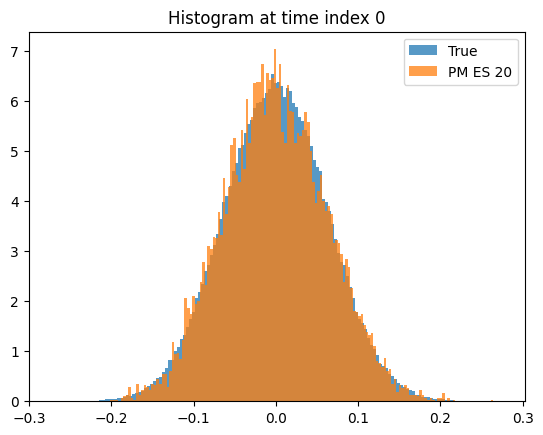

Hi
9
9
9
9
9
9
9
9
9


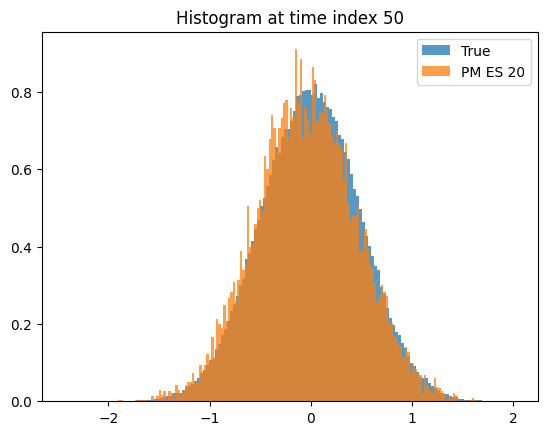

Hi
9
9
9
9
9
9
9
9
9


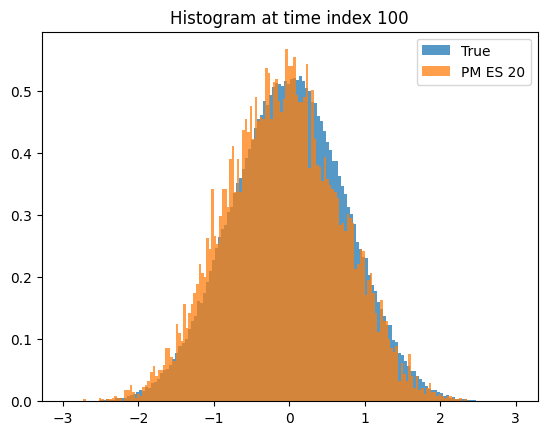

Hi
9
9
9
9
9
9
9
9
9


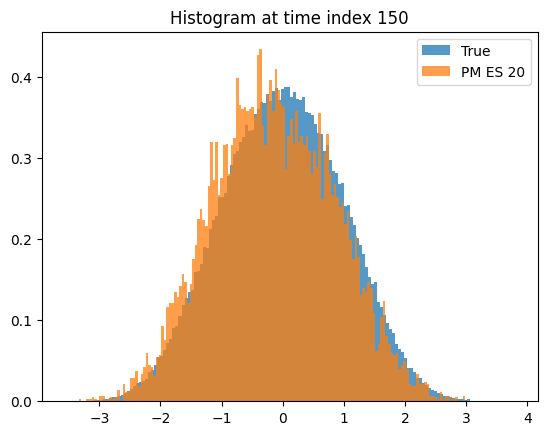

Hi
9
9
9
9
9
9
9
9
9


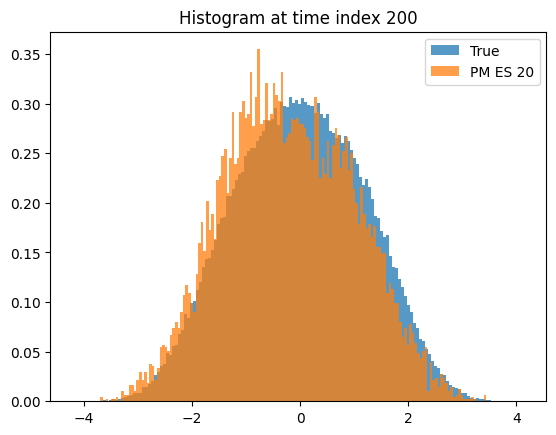

Hi
9
9
9
9
9
9
9
9
9


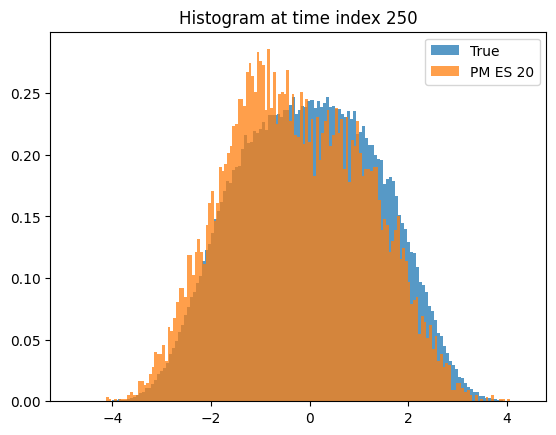

Hi
9


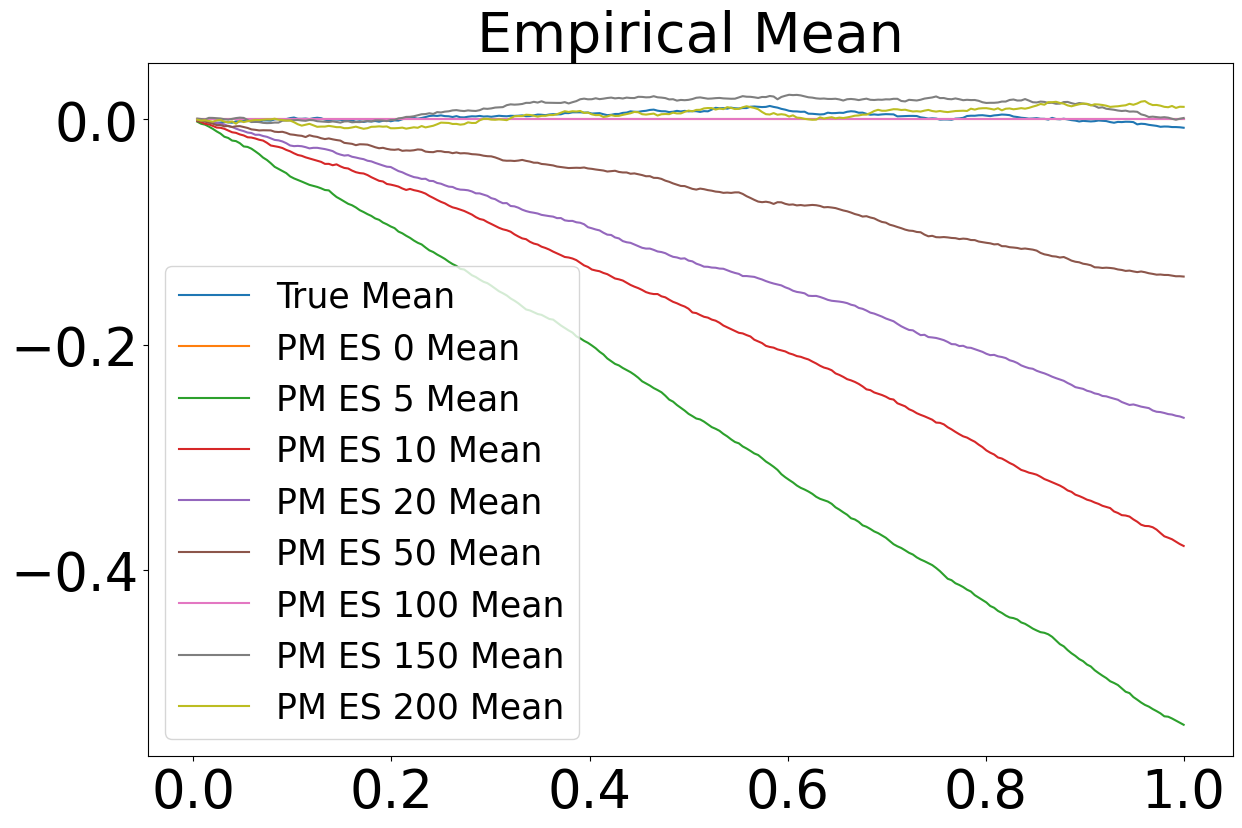

9


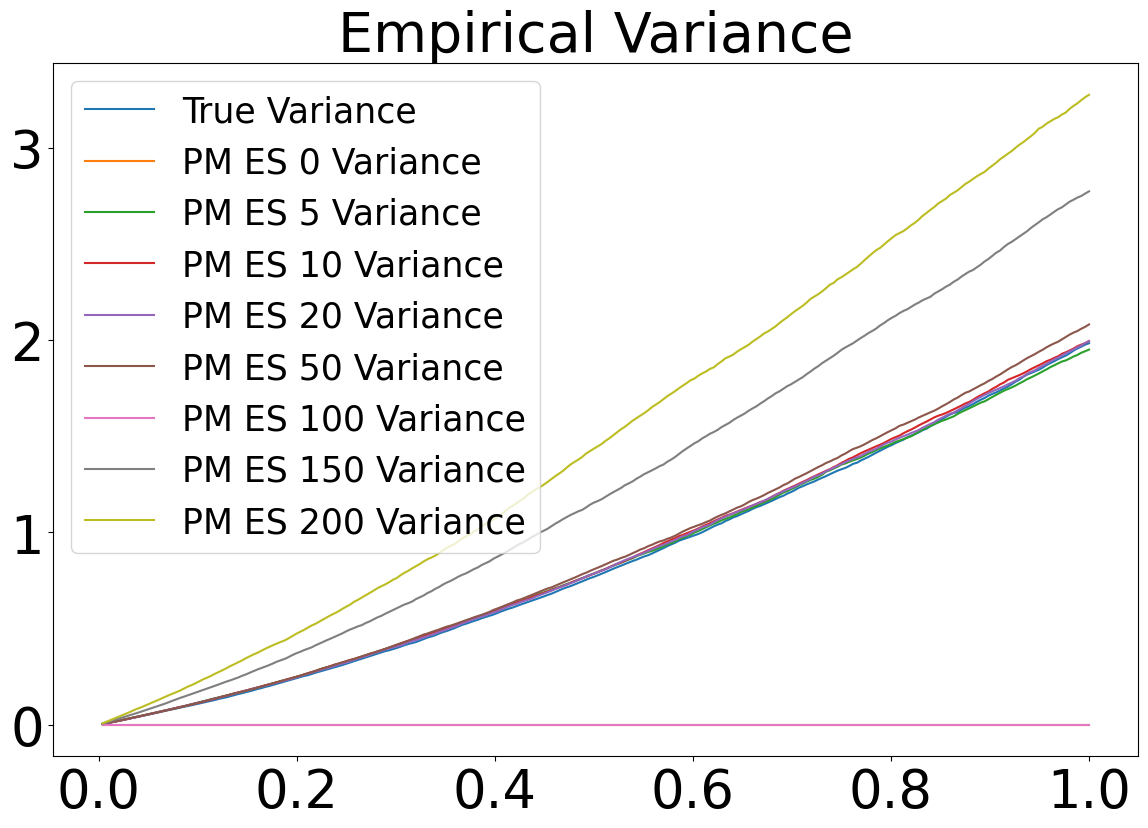

9


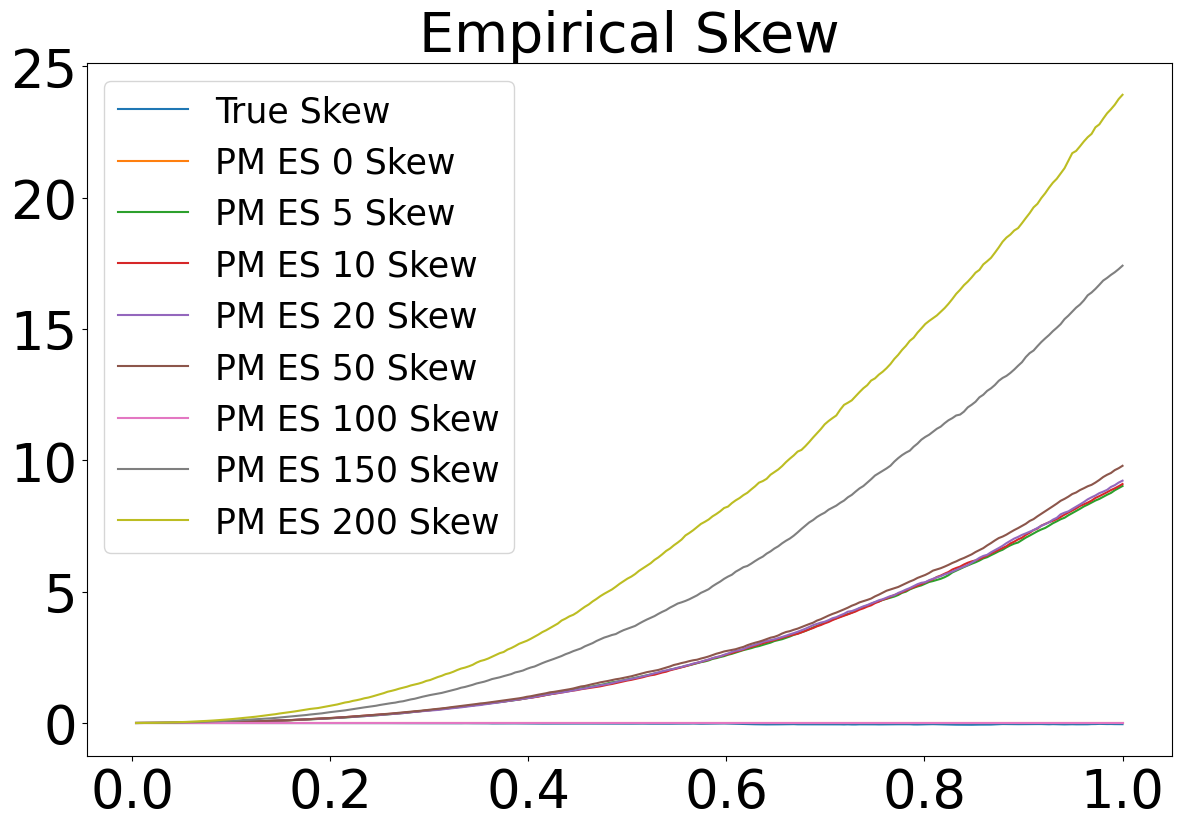

9


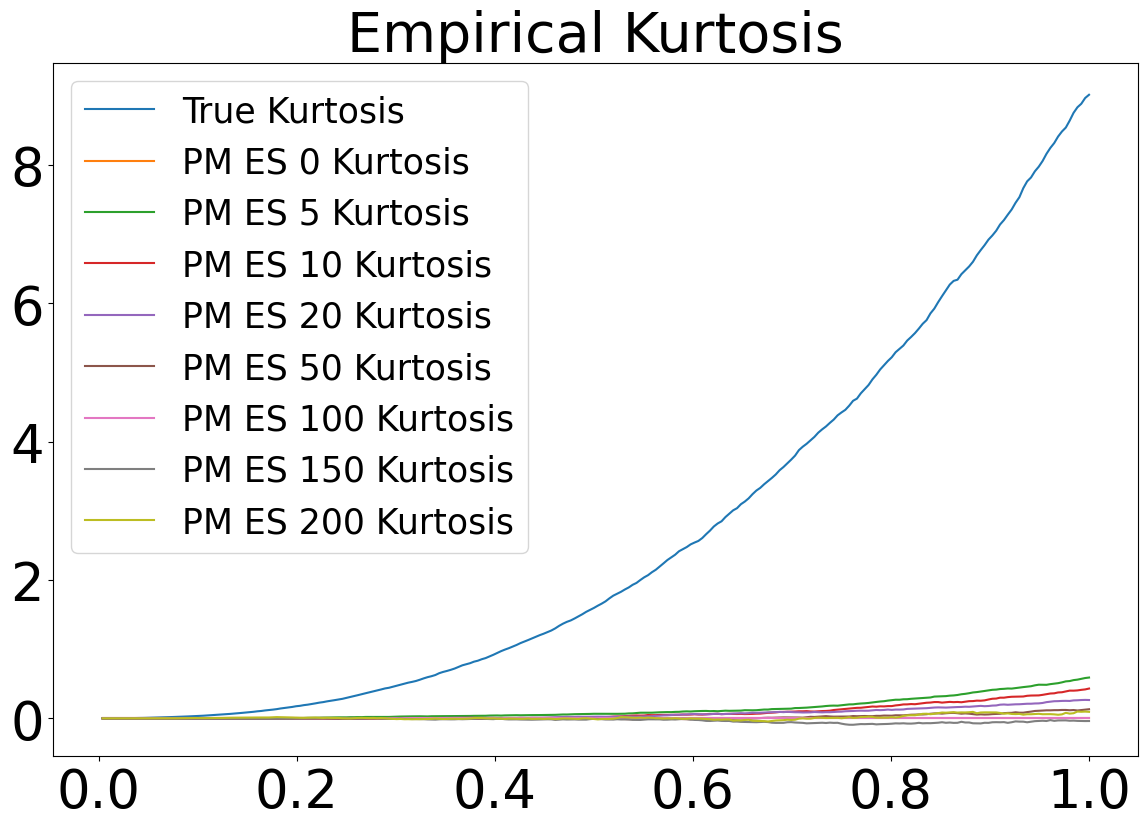

In [48]:
Nepoch = 960
means = [true_m]
vars = [true_v]
skews = [true_s]
kurt = [true_k]
ppaths = [true_data]
for config in [config_PM]:
    Ndiff = 10000#config.max_diff_steps
    for es in [0,5,10,20,50,100,150,200]:#, 10, 100, 200
        if "PMS" in config.scoreNet_trained_path:
            type = "PMS"
        elif "PM" in config.scoreNet_trained_path:
            type = "PM"
        else:
            type = ""
        try:
            file_path = f"/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/TS{type}_ES{es}_fSin_PathGen_{Nepoch}Nep_{config.loss_factor}LFactor_10MeanRev_{Ndiff}DiffSteps_"#{type}_mkv_ES
            if type == "":
                type="Standard"

            paths = torch.load(file_path+"paths")
            paths = paths[:, 1:T+1]
            ppaths.append(paths)
            print(type, es)
            if type == "":
                type="Standard"
            m, v, k, s = moment_calculations(paths)
            means.append(m)
            vars.append(v)
            skews.append(s)
            kurt.append(k)
        except FileNotFoundError as e:
            ppaths.append(np.zeros((10000, T)))
            m = np.zeros(T)
            means.append(m)
            vars.append(m)
            skews.append(m)
            kurt.append(m)
            print(e)

for t in range(0,ppaths[0].shape[1], 50):
    for i in range(len(means)):
        print(len(means))
        if i == 0:
            label = "True"
            plt.hist(ppaths[i][:, t], bins=150, density=True, alpha=0.75, label=label)
        elif i == 1:
            label = f"{type} ES 0"
        elif i == 2:
            label = f"{type} ES 5"
        elif i == 3:
            label = f"{type} ES 10"
        elif i == 4:
            label = f"{type} ES 20"
            plt.hist(ppaths[i][:, t], bins=150, density=True, alpha=0.75, label=label)
        elif i ==5:
            label = f"{type} ES 50"
        elif i == 6:
            label=f"{type} ES 100"
        elif i == 7:
            label=f"{type} ES 150"
        elif i == 8:
            label=f"{type} ES 200"


#        plt.hist(ppaths[i][:, t], bins=150, density=True, alpha=0.75, label=label)
    plt.title(f"Histogram at time index {t}")
    plt.legend()
    plt.show()
    plt.close()
    print("Hi")
for mom in ["Mean", "Variance", "Skew", "Kurtosis"]:
    print(len(means))
    if mom == "Mean":
        ts = means
    elif mom == "Variance":
        ts = vars
    elif mom == "Skew":
        ts = skews
    else:
        ts = kurt
    fig, ax = plt.subplots(figsize=(14,9))
    for i in range(len(ppaths)):
        if i == 0:
            label = "True"
        elif i == 1:
            label = f"{type} ES 0"
        elif i == 2:
            label = f"{type} ES 5"
        elif i == 3:
            label = f"{type} ES 10"
        elif i == 4:
            label = f"{type} ES 20"
        elif i ==5:
            label = f"{type} ES 50"
        elif i == 6:
            label=f"{type} ES 100"
        elif i == 7:
            label=f"{type} ES 150"
        elif i == 8:
            label=f"{type} ES 200"
        plot_ts(ax=ax, ts=ts[i], T=T,label=f"{label} {mom}", moment=f"{mom}")
    plt.show()
    plt.close()


